In [3]:
import numpy as np 
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
plt.rcParams.update({'font.size':18})

In [4]:
def fourier(tiempo,voltaje):
    t_max=np.max(tiempo)
    Ts=t_max/len(tiempo)
    Fs=1/Ts
    amplitude=np.abs(np.fft.fft(voltaje))/(len(tiempo)/2)
    F=Fs*np.arange(0,len(voltaje))/len(voltaje)
    return F[0:len(F)//2], amplitude[0:len(F)//2]

In [5]:
def descripcion(data, bins=10, time_name="TIME", voltaje_name="CH1", ylim_serie_temporal=(-0.4, 0.4), ylim_serie_frecuencias=(0,0.005), invertir=False):
    plt.figure(figsize=(18,15))
    decimal=5
    plt.subplot(3,1,1)
    data[voltaje_name].hist(density=True,label="<v>= {} \n std= {}".format(round(data[voltaje_name].mean(),decimal),round(data[voltaje_name].std(),decimal-2)), bins=bins)
    plt.title("Histograma del ruido",fontsize=20)
    plt.xlabel('Voltaje',fontsize=18)
    plt.legend(fontsize=18)


    plt.subplot(3,1,2)
    plt.plot(data[time_name],data[voltaje_name])
    plt.ylim(*ylim_serie_temporal)
    plt.xlabel('tiempo',fontsize=18)
    plt.ylabel("Voltaje",fontsize=18)
    if invertir:
        plt.gca().invert_yaxis()
    plt.title("Ruido puro",fontsize=20)

    plt.subplot(3,1,3)
    frecuencia, amplitud= fourier(data[time_name],data[voltaje_name])
    plt.plot(frecuencia, amplitud)
    plt.ylim(*ylim_serie_frecuencias)
    plt.xlabel('f (Hz)',fontsize=18)
    plt.ylabel("Amplitud",fontsize=18)
    plt.title("Transformada de Fourier del ruido",fontsize=20)

    plt.tight_layout()
    plt.show()

In [35]:
def descripcion_dual(data_sin_ruido, data_con_ruido, bins=10, time_name="TIME", voltaje_name="CH1", 
                     ylim_serie_temporal=(-0.4, 0.4), 
                     ylim_serie_frecuencias=(0,0.005), 
                     xlim_serie_frecuencias=(30,70), 
                     invertir=False):
    plt.figure(figsize=(18,15))
    decimal=5
    plt.subplot(3,1,1)
    plt.hist(data_sin_ruido[voltaje_name],
             density=True,
             label="Pila\n <v>= {} \n std= {}".format(round(data_sin_ruido[voltaje_name].mean()
                                                                                               ,decimal)
                                                                                         ,round(data_sin_ruido[voltaje_name].std(),
                                                                                                decimal-2)),
             bins=bins)
    plt.hist(data_con_ruido[voltaje_name],density=True,label="red eléctrica\n <v>= {} \n std= {}".format(round(data_sin_ruido[voltaje_name].mean()
                                                                                               ,decimal)
                                                                                         ,round(data_sin_ruido[voltaje_name].std(),
                                                                                                decimal-2)),
             bins=bins,
            alpha=0.75)
    plt.title("Histograma del ruido",fontsize=20)
    plt.xlabel('Voltaje',fontsize=18)
    plt.legend(fontsize=18)


    plt.subplot(3,1,2)
    plt.plot(data_sin_ruido[time_name],data_sin_ruido[voltaje_name])
    plt.plot(data_con_ruido[time_name],data_con_ruido[voltaje_name])
    plt.ylim(*ylim_serie_temporal)
    plt.xlabel('tiempo',fontsize=18)
    plt.ylabel("Voltaje",fontsize=18)
    if invertir:
        plt.gca().invert_yaxis()
    plt.title("Ruido puro",fontsize=20)

    plt.subplot(3,1,3)
    frecuencia_sin_ruido, amplitud_sin_ruido= fourier(data_sin_ruido[time_name],data_sin_ruido[voltaje_name])
    frecuencia_con_ruido, amplitud_con_ruido= fourier(data_con_ruido[time_name],data_con_ruido[voltaje_name])
    plt.plot(frecuencia_sin_ruido, amplitud_sin_ruido)
    plt.plot(frecuencia_con_ruido, amplitud_con_ruido, alpha=0.7)
    plt.ylim(*ylim_serie_frecuencias)
    plt.xlim(*xlim_serie_frecuencias)
    plt.xlabel('f (Hz)',fontsize=18)
    plt.ylabel("Amplitud",fontsize=18)
    plt.title("Transformada de Fourier del ruido",fontsize=20)

    plt.tight_layout()
    plt.show()

In [36]:
def analisis(file_name, voltaje_name="CH1", bins=15, ylim_serie_temporal=(-0.4,0.4), ylim_serie_frecuencias=(0,0.01), invertir=False):
    data = pd.read_csv(file_name)
    descripcion(data, bins= bins, ylim_serie_temporal=ylim_serie_temporal, ylim_serie_frecuencias=ylim_serie_frecuencias, invertir=invertir)
    statistics = data[voltaje_name].describe()
    print(statistics)
    return statistics, data

In [37]:
path="datos_comparacion_fuente/"
pila=pd.read_csv(path + "2.csv")
red=pd.read_csv(path+"1.csv")

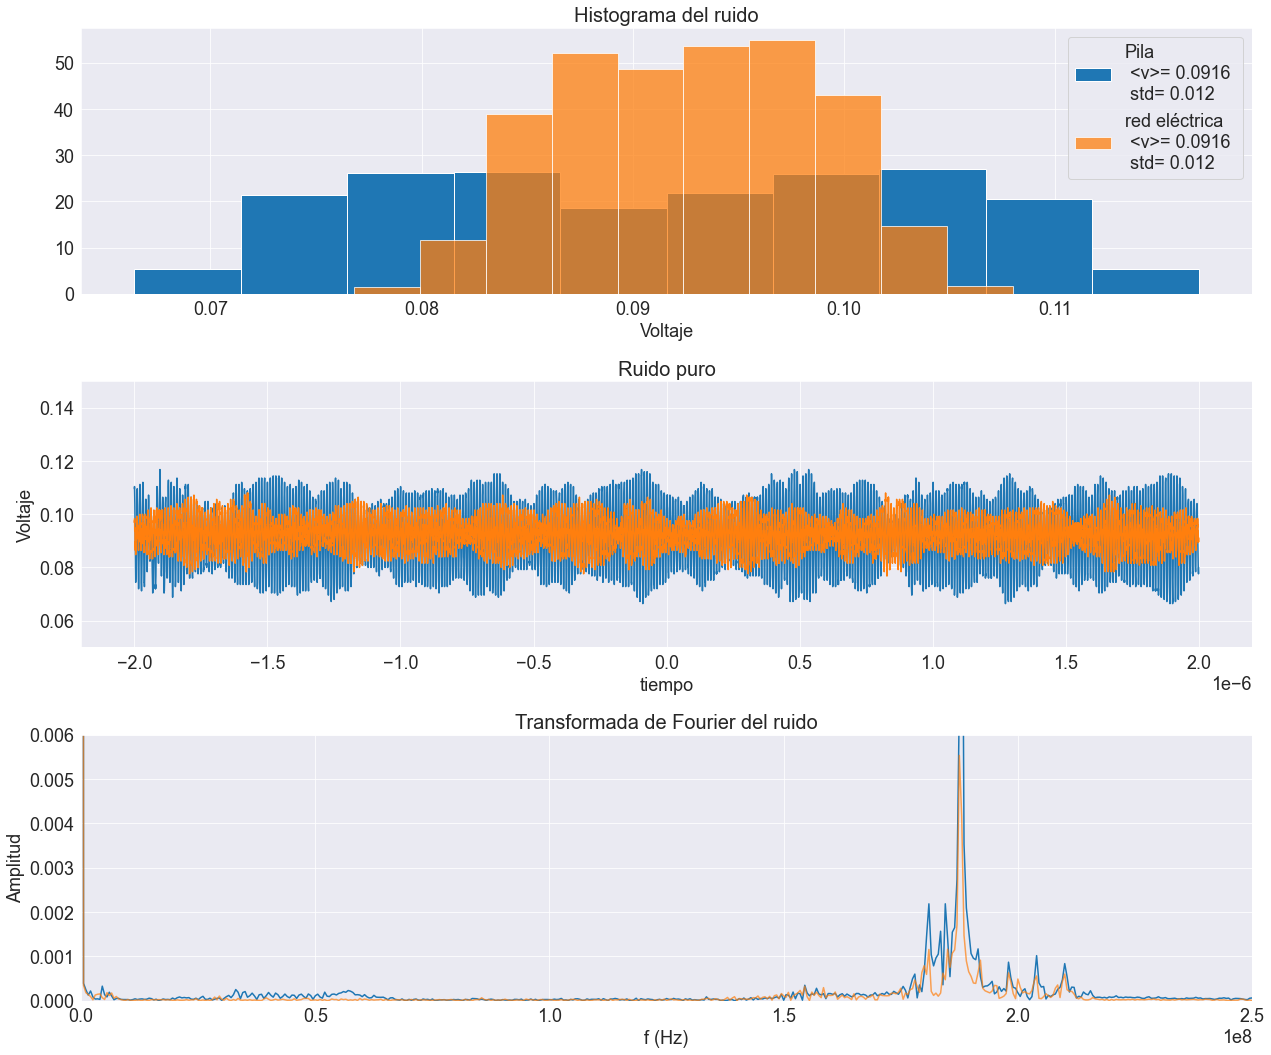

In [48]:
descripcion_dual(pila, red, 
                 ylim_serie_frecuencias=(0,0.006), 
                 xlim_serie_frecuencias=(0,2.5e8),
                 ylim_serie_temporal=(0.05, 0.15))

In [40]:
c=299792458 
f=1.87e8
l=c/f
print(l)

1.6031682245989305
